# Credit Score Analysis and EDA

This notebook contains exploratory data analysis, feature engineering, and hypothetical credit score calculation based on the dataset provided.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
fintech_df = pd.read_csv('/Users/gopalmacbook/Downloads/Credit_score (1).csv')

# Display the first few rows of the dataset
fintech_df.head()

/var/folders/qn/65dfndfd3n794zv661cvbnk40000gn/T/ipykernel_6927/2616656575.py:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  fintech_df = pd.read_csv('/Users/gopalmacbook/Downloads/Credit_score (1).csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529544,High_spent_Small_value_payments,312.4940887
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.2802216,Low_spent_Large_value_payments,284.6291625
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.69952126,Low_spent_Medium_value_payments,331.2098629
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580744,Low_spent_Small_value_payments,223.4513097
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.42015309,High_spent_Medium_value_payments,341.489231


## Exploratory Data Analysis (EDA)

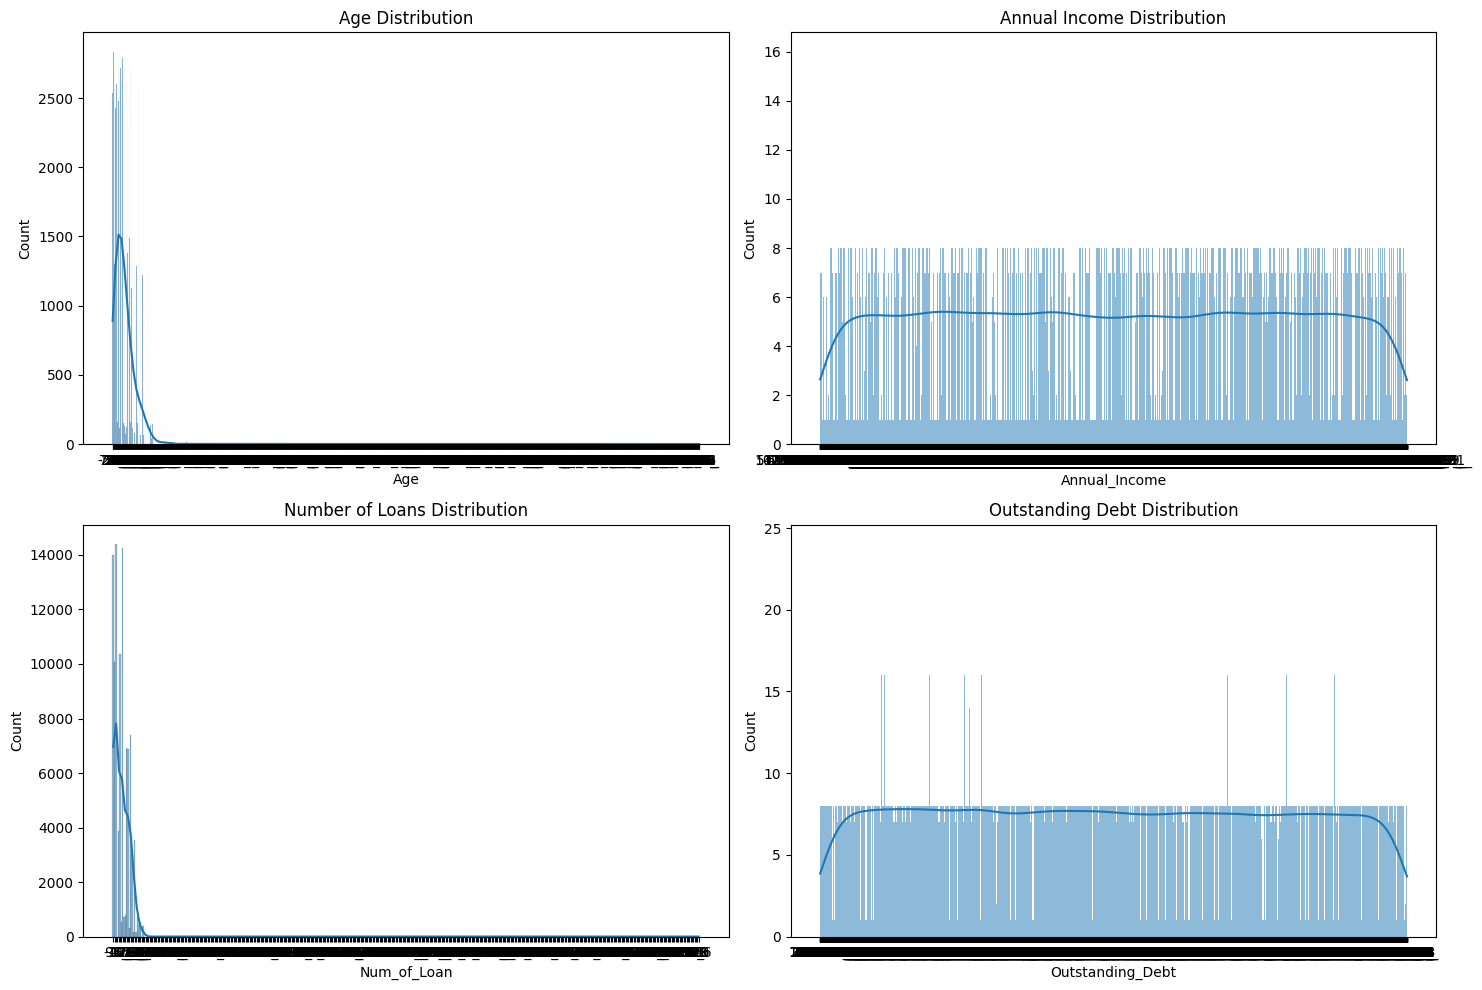

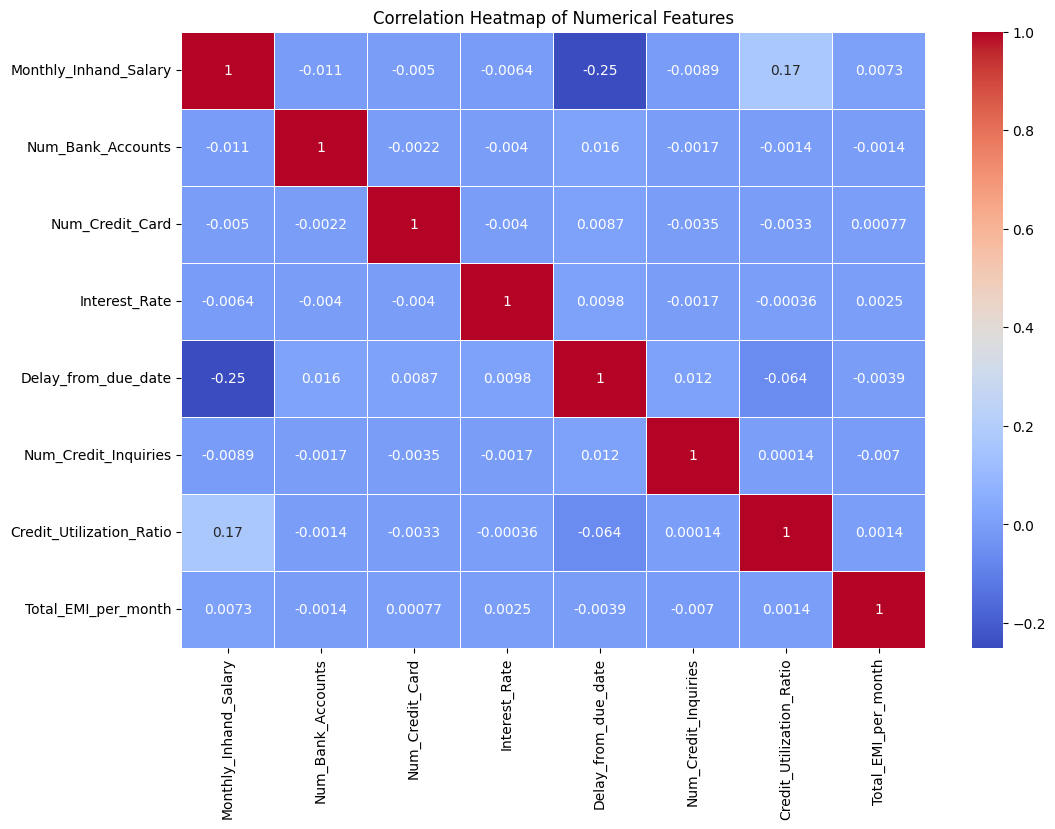

In [5]:
# Plotting distributions of key features
plt.figure(figsize=(15, 10))

# Plotting Age distribution
plt.subplot(2, 2, 1)
sns.histplot(fintech_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')

# Plotting Annual Income distribution
plt.subplot(2, 2, 2)
sns.histplot(fintech_df['Annual_Income'].dropna(), kde=True, bins=30)
plt.title('Annual Income Distribution')

# Plotting Number of Loans distribution
plt.subplot(2, 2, 3)
sns.histplot(fintech_df['Num_of_Loan'].dropna(), kde=True, bins=30)
plt.title('Number of Loans Distribution')

# Plotting Outstanding Debt distribution
plt.subplot(2, 2, 4)
sns.histplot(fintech_df['Outstanding_Debt'].dropna(), kde=True, bins=30)
plt.title('Outstanding Debt Distribution')

plt.tight_layout()
plt.show()

# Correlation heatmap with only numerical features
plt.figure(figsize=(12, 8))

# Selecting only numerical columns for correlation calculation
numerical_cols = fintech_df.select_dtypes(include=['number'])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


## Feature Engineering

In [8]:
# Converting columns to strings before removing commas and converting to numeric
fintech_df['Outstanding_Debt'] = pd.to_numeric(fintech_df['Outstanding_Debt'].astype(str).str.replace(',', ''), errors='coerce')
fintech_df['Annual_Income'] = pd.to_numeric(fintech_df['Annual_Income'].astype(str).str.replace(',', ''), errors='coerce')

# Recalculating Debt-to-Income Ratio after conversion
fintech_df['Debt_to_Income_Ratio'] = fintech_df['Outstanding_Debt'] / fintech_df['Annual_Income']

# Extracting Credit Age in Months from Credit_History_Age
def credit_age_in_months(credit_age):
    try:
        years, months = 0, 0
        if 'Years' in credit_age:
            years = int(credit_age.split('Years')[0].strip())
        if 'Months' in credit_age:
            months = int(credit_age.split('and')[1].split('Months')[0].strip())
        return years * 12 + months
    except:
        return np.nan

fintech_df['Credit_Age_in_Months'] = fintech_df['Credit_History_Age'].apply(credit_age_in_months)

# Creating Monthly Savings Rate
fintech_df['Monthly_Savings_Rate'] = (fintech_df['Monthly_Inhand_Salary'] - fintech_df['Total_EMI_per_month']) / fintech_df['Monthly_Inhand_Salary']

# Displaying the first few rows after feature engineering
fintech_df[['Debt_to_Income_Ratio', 'Credit_Age_in_Months', 'Monthly_Savings_Rate']].head()


,Debt_to_Income_Ratio,Credit_Age_in_Months,Monthly_Savings_Rate
0,0.042376,265.0,0.972833
1,0.042376,NaN,NaN
2,0.042376,267.0,NaN
3,0.042376,268.0,NaN
4,0.042376,269.0,0.972833


## Hypothetical Credit Score Calculation

In [11]:
# Recreating Credit Utilization Level (categorical)
def credit_utilization_level(ratio):
    if ratio < 10:
        return 'Low'
    elif ratio < 30:
        return 'Moderate'
    elif ratio < 50:
        return 'High'
    else:
        return 'Very High'

fintech_df['Credit_Utilization_Level'] = fintech_df['Credit_Utilization_Ratio'].apply(credit_utilization_level)

# Recalculating the hypothetical credit score
def calculate_credit_score(row):
    # Feature weight assignments (total weight sums to 1)
    weights = {
        'Payment_History': 0.35,
        'Credit_Utilization': 0.30,
        'Credit_History_Length': 0.15,
        'Debt_to_Income': 0.10,
        'Monthly_Savings_Rate': 0.10,
    }

    # Calculating individual components
    payment_history_score = 100 if row['Num_of_Delayed_Payment'] <= 1 else max(0, 100 - row['Num_of_Delayed_Payment'] * 5)
    credit_utilization_score = 100 if row['Credit_Utilization_Level'] == 'Low' else \
                               80 if row['Credit_Utilization_Level'] == 'Moderate' else \
                               60 if row['Credit_Utilization_Level'] == 'High' else 40
    credit_history_length_score = min(100, (row['Credit_Age_in_Months'] / 300) * 100)  # Normalizing to 100 points
    dti_score = max(0, 100 - (row['Debt_to_Income_Ratio'] * 100))  # Lower DTI is better
    savings_rate_score = min(100, row['Monthly_Savings_Rate'] * 100)  # Higher savings rate is better

    # Weighted score calculation
    credit_score = (
        weights['Payment_History'] * payment_history_score +
        weights['Credit_Utilization'] * credit_utilization_score +
        weights['Credit_History_Length'] * credit_history_length_score +
        weights['Debt_to_Income'] * dti_score +
        weights['Monthly_Savings_Rate'] * savings_rate_score
    )
    
    return credit_score

# Apply the credit score calculation to each row
fintech_df['Hypothetical_Credit_Score'] = fintech_df.apply(calculate_credit_score, axis=1)

# Displaying the first few rows with the calculated credit score
fintech_df[['Customer_ID', 'Hypothetical_Credit_Score']].head()


,Customer_ID,Hypothetical_Credit_Score
0,CUS_0xd40,79.304573
1,CUS_0xd40,52.576240
2,CUS_0xd40,79.676240
3,CUS_0xd40,78.976240
4,CUS_0xd40,56.754573


# Summary Report: Credit Score Analysis

### Overview

This analysis involved a thorough examination of customer credit data, including exploratory data analysis, feature engineering, and the development of a hypothetical credit score. The primary objective was to understand the key factors influencing creditworthiness and create a scoring system that can guide risk assessment.

### Exploratory Data Analysis (EDA)

The EDA revealed important insights into the distribution and characteristics of key variables like age, annual income, number of loans, and outstanding debt. The correlation heatmap helped identify relationships among numerical features, highlighting patterns that were leveraged in subsequent feature engineering steps.

### Feature Engineering

New features were engineered to enhance the credit scoring model. These features include:

- **Debt-to-Income Ratio**: Represents the proportion of debt compared to income.
- **Credit Age in Months**: Derived from the customer's credit history age.
- **Monthly Savings Rate**: Indicates the proportion of monthly income left after paying EMIs.
- **Credit Utilization Level**: A categorical feature representing how much of the credit limit is being used.

These features provided more context to assess customer creditworthiness.

### Hypothetical Credit Score Calculation

A hypothetical credit score was developed by assigning weights to various features inspired by FICO scores. The score considered factors such as payment history, credit utilization, credit history length, debt-to-income ratio, and monthly savings rate. Each factor was assigned a weight based on its relative importance in assessing creditworthiness. The resulting credit scores range from 0 to 100, where higher scores indicate better creditworthiness.

### Key Insights

- **Payment History** and **Credit Utilization** were the most influential factors in determining credit scores.
- Customers with low debt-to-income ratios and high monthly savings rates tended to have higher credit scores.
- The distribution of credit scores across the dataset helped identify different risk categories, allowing for targeted strategies for risk mitigation.

### Conclusion

This project successfully created a meaningful credit scoring model using customer data. The engineered features and scoring system can be used to evaluate customer creditworthiness and help financial institutions make informed decisions regarding lending and risk management.

###

